# Regression analysis

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt   
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

**Importing different libraries to be used in building the Regression Model**
- Pandas for maniplulation
- Numpy
- Matplotlib for visualization
- Statsmodel to build multiple regression
- Scikit Learn to build Linear Regression 
- Sklearn metrics to compute R-Squared

First we have to read our dataset and have a look at the first 5

In [3]:
df_merged = pd.read_csv("../Data/daily_weather_merged.csv")

In [4]:
df_merged.head()

,Unnamed: 0,day,LCLid,energy_sum,energy_mean,energy_max,energy_min,energy_std,energy_count,dayTime,visibility,temperatureMin,temperatureMax,icon,cloudCover,moonPhase
0,0,2011-11-23,MAC000149,2.287,0.081679,0.198,0.000,0.052851,28,8.52,8.06,3.81,10.36,fog,0.36,0.94
1,1,2011-11-23,MAC000154,5.798,0.252087,0.999,0.098,0.219155,23,8.52,8.06,3.81,10.36,fog,0.36,0.94
2,2,2011-11-23,MAC000156,6.523,0.296500,0.512,0.162,0.108046,22,8.52,8.06,3.81,10.36,fog,0.36,0.94
3,3,2011-11-23,MAC000150,9.254,0.330500,1.162,0.059,0.313498,28,8.52,8.06,3.81,10.36,fog,0.36,0.94
4,4,2011-11-23,MAC000147,3.036,0.108429,0.315,0.033,0.071653,28,8.52,8.06,3.81,10.36,fog,0.36,0.94


Our dataframe contains a lot of information regarding energy consumption, however our goal is to investigate which variables correlate with energy consumption in the UK. In this case, our target variable will be the sum of energy(energy_sum), the sum of energy being consumed per household.

In [5]:
#df_merged = df_merged.drop(columns = ['energy_mean','energy_max','energy_min','energy_std','energy_count'])

In [6]:
df_merged.corr()

,Unnamed: 0,energy_sum,energy_mean,energy_max,energy_min,energy_std,energy_count,dayTime,visibility,temperatureMin,temperatureMax,cloudCover,moonPhase
Unnamed: 0,1.000000,0.015727,0.016726,0.006051,0.007317,0.012307,-0.013927,-0.282833,-0.007156,-0.101954,-0.107935,-0.012012,0.012916
energy_sum,0.015727,1.000000,0.993789,0.765571,0.709064,0.779652,0.063595,-0.155491,-0.057871,-0.162209,-0.169893,0.055220,-0.011047
energy_mean,0.016726,0.993789,1.000000,0.763081,0.730749,0.779707,0.004787,-0.155208,-0.058052,-0.163280,-0.171155,0.056227,-0.007731
energy_max,0.006051,0.765571,0.763081,1.000000,0.358941,0.945955,0.053773,-0.133864,-0.053414,-0.148734,-0.154002,0.049828,-0.009239
energy_min,0.007317,0.709064,0.730749,0.358941,1.000000,0.272997,-0.078905,-0.045883,-0.017483,-0.053391,-0.055462,0.018324,0.001037
energy_std,0.012307,0.779652,0.779707,0.945955,0.272997,1.000000,-0.000478,-0.158844,-0.061735,-0.173328,-0.180356,0.058609,-0.006214
energy_count,-0.013927,0.063595,0.004787,0.053773,-0.078905,-0.000478,1.000000,-0.006474,0.001722,0.018552,0.022019,-0.017678,-0.057401
dayTime,-0.282833,-0.155491,-0.155208,-0.133864,-0.045883,-0.158844,-0.006474,1.000000,0.266999,0.640114,0.701426,-0.156622,0.007926
visibility,-0.007156,-0.057871,-0.058052,-0.053414,-0.017483,-0.061735,0.001722,0.266999,1.000000,0.202849,0.299871,-0.382609,0.076821
temperatureMin,-0.101954,-0.162209,-0.163280,-0.148734,-0.053391,-0.173328,0.018552,0.640114,0.202849,1.000000,0.904017,-0.116567,0.004664


Group dataframe by date, sorted by ascending date, reset index

In [7]:
df_merged = (df_merged.groupby(['day'])
            .mean()
            .sort_values('day')
            .reset_index()
            .drop(columns = ['Unnamed: 0'])
            )

In [8]:
df_merged.head()

,day,energy_sum,energy_mean,energy_max,energy_min,energy_std,energy_count,dayTime,visibility,temperatureMin,temperatureMax,cloudCover,moonPhase
0,2011-11-23,6.952692,0.281091,0.756538,0.085615,0.174167,25.692308,8.520000,8.06,3.81,10.36,0.36,0.94
1,2011-11-24,8.536480,0.234207,0.761840,0.080760,0.156369,36.880000,8.476111,10.64,8.56,12.93,0.41,0.97
2,2011-11-25,9.499781,0.224901,0.726438,0.071344,0.155090,43.218750,8.433333,12.38,7.46,13.03,0.48,0.01
3,2011-11-26,10.267707,0.247635,0.826049,0.073220,0.173554,43.243902,8.391944,13.07,7.01,12.96,0.44,0.05
4,2011-11-27,10.850805,0.226058,0.865463,0.069927,0.175145,48.000000,8.351667,13.08,4.47,13.54,0.42,0.08


Oveerview of correlation between all variables

In [9]:
df_merged.corr()

,energy_sum,energy_mean,energy_max,energy_min,energy_std,energy_count,dayTime,visibility,temperatureMin,temperatureMax,cloudCover,moonPhase
energy_sum,1.000000,0.971418,0.966926,0.564625,0.969559,0.199996,-0.768339,-0.245011,-0.804079,-0.843281,0.240353,-0.033909
energy_mean,0.971418,1.000000,0.947733,0.713918,0.969947,-0.033329,-0.797207,-0.250845,-0.831273,-0.870275,0.241900,-0.016539
energy_max,0.966926,0.947733,1.000000,0.516722,0.996123,0.161861,-0.709813,-0.256090,-0.801639,-0.822014,0.218946,-0.025132
energy_min,0.564625,0.713918,0.516722,1.000000,0.793153,-0.600660,-0.546729,-0.142262,-0.572748,-0.601007,0.165484,0.021400
energy_std,0.969559,0.969947,0.996123,0.793153,1.000000,-0.008897,-0.744262,-0.265982,-0.830556,-0.856081,0.231014,-0.008420
energy_count,0.199996,-0.033329,0.161861,-0.600660,-0.008897,1.000000,0.044510,0.008862,0.053193,0.053094,-0.003660,-0.088564
dayTime,-0.768339,-0.797207,-0.709813,-0.546729,-0.744262,0.044510,1.000000,0.198165,0.632180,0.694892,-0.129595,0.019402
visibility,-0.245011,-0.250845,-0.256090,-0.142262,-0.265982,0.008862,0.198165,1.000000,0.191942,0.261507,-0.332863,0.061707
temperatureMin,-0.804079,-0.831273,-0.801639,-0.572748,-0.830556,0.053193,0.632180,0.191942,1.000000,0.896142,-0.062109,-0.013204
temperatureMax,-0.843281,-0.870275,-0.822014,-0.601007,-0.856081,0.053094,0.694892,0.261507,0.896142,1.000000,-0.333338,0.005851


Look at correlation of variables with 'energy_sum'

In [10]:
df_merged.corr()['energy_sum']

energy_sum        1.000000
energy_mean       0.971418
energy_max        0.966926
energy_min        0.564625
energy_std        0.969559
energy_count      0.199996
dayTime          -0.768339
visibility       -0.245011
temperatureMin   -0.804079
temperatureMax   -0.843281
cloudCover        0.240353
moonPhase        -0.033909
Name: energy_sum, dtype: float64

The above correlation values show both negative and positive correlation and as well weak and strong correlation among the variables. However, we are interested in how the time of the day('dayTime') and the temperature variables affect the level of energy consumption. On that basis we only need the relevant columns useful to our regression model.

Select required columns

In [11]:
model_df = df_merged[["energy_sum", "temperatureMin", "temperatureMax", "dayTime"]]
model_df.head()

,energy_sum,temperatureMin,temperatureMax,dayTime
0,6.952692,3.81,10.36,8.520000
1,8.536480,8.56,12.93,8.476111
2,9.499781,7.46,13.03,8.433333
3,10.267707,7.01,12.96,8.391944
4,10.850805,4.47,13.54,8.351667


Things are starting to take shape, it's a good idea to visualize the trend between variables before creating a regression model. This approach helps to see the trend and also see data points that can be an outlier which can pose a threat to our model. Below is the scatter plot showing the relationship between our dependent and independent variables.

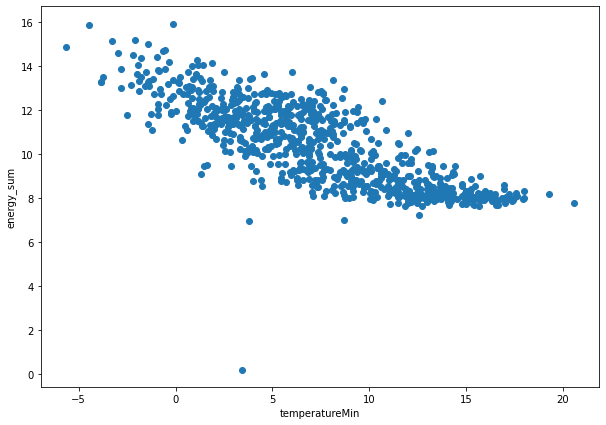

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(df_merged[["temperatureMin"]], df_merged[["energy_sum"]])
plt.xlabel("temperatureMin")
plt.ylabel("energy_sum")
plt.show()

From the above plot above there appears to be a fairly strong negative correlation. However, we are skeptical about the isolated datapoint which is almost certainly an outlier. This datapoint doesn't reflect the representation of other points, it's strange to have energy consumption of less than 1 with a minimum temperature of around 4 degrees (see isolated record below). On this basis we will remove this outlier.

In [13]:
model_df.loc[model_df["energy_sum"] < 2]

,energy_sum,temperatureMin,temperatureMax,dayTime
826,0.208997,3.43,7.35,10.829167


In [14]:
model_df.drop(index = 826, inplace = True)

Re-plot with outlier removed

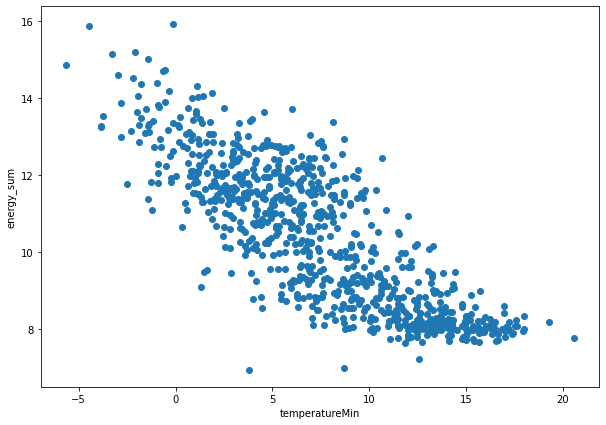

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(model_df[["temperatureMin"]], model_df[["energy_sum"]])
plt.xlabel("temperatureMin")
plt.ylabel("energy_sum")
plt.show()

Our plot looks better after the removal of the outlier. This plot shows a negative correlation which highlights that as the temperatureMin increases, the energy consumption decreases. Now we can build a linear regression model using the Scikit learn library we imported. We will also create a best fit line for our model which we will use to make predictions.

## Linear regression model - energy consumption v minimum temperature

Fit the regression model

In [16]:
regressor1 = LinearRegression()
regressor1.fit(model_df[["temperatureMin"]], model_df[["energy_sum"]])

LinearRegression()

Plot regression line onto previous scatterplot

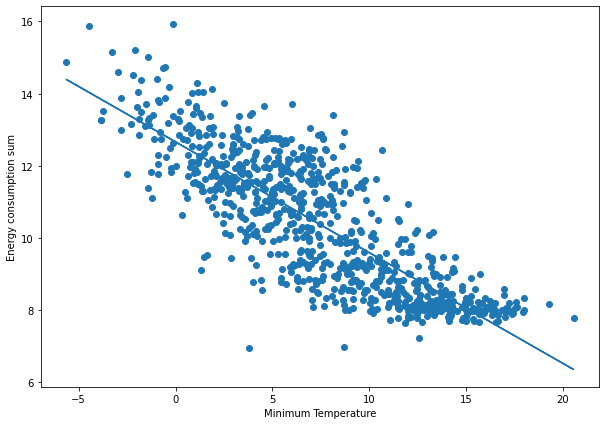

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(model_df[["temperatureMin"]], model_df[["energy_sum"]])
plt.xlabel("Minimum Temperature")
plt.ylabel("Energy consumption sum")
plt.plot(model_df[["temperatureMin"]], regressor1.predict(model_df[["temperatureMin"]]))

The regression line shown above authenticates our claim of a negative correlation between 'temperatureMin' and 'energy_sum'. Next is to check the accuracy of the model  by checking the R-Squared value before proceeding to making predictions.

In [18]:
print("the intercept is", regressor1.intercept_)
print("the coefficient is", regressor1.coef_)
print("the R-squared is", round(regressor1.score(model_df[["temperatureMin"]], model_df[["energy_sum"]]), 2))

the intercept is [12.66217242]
the coefficient is [[-0.30692806]]
the R-squared is 0.68


An R-squared value of 0.68 shows that the model has a fairly strong correlation, it tells us that 68 percent of the dependent variable variation can can be explained or impacted by our independent variable. The regression line is expected to intercept the y-axis at approximately 12.66, while the coefficient tells us the slope of the regression line -0.31 (the rate of change of our dependent variable relative to the independent variable). Now, let's test our model by doing some predictions of minimum temperature from 21 to 35 and see what the energy consumption might look like. 

In [19]:
future_temp = np.array(range(21, 36))
future_temp = future_temp.reshape(-1, 1)
future_energy_consumption = regressor1.predict(future_temp)
print(future_energy_consumption)

[[6.21668318]
 [5.90975512]
 [5.60282707]
 [5.29589901]
 [4.98897095]
 [4.68204289]
 [4.37511483]
 [4.06818677]
 [3.76125871]
 [3.45433065]
 [3.14740259]
 [2.84047453]
 [2.53354647]
 [2.22661842]
 [1.91969036]]


The values above are the predicted energy consumption for minimum temperatures of 21 to 35 degrees. The plot below shows a new regression line - the red line is our newly predicted energy consumption for temperature ranging from 21 to 36 degrees. It's a feasible scenerio to have energy consumption reducing drastically when we have a high minimum temperature which is evident from the plot below.

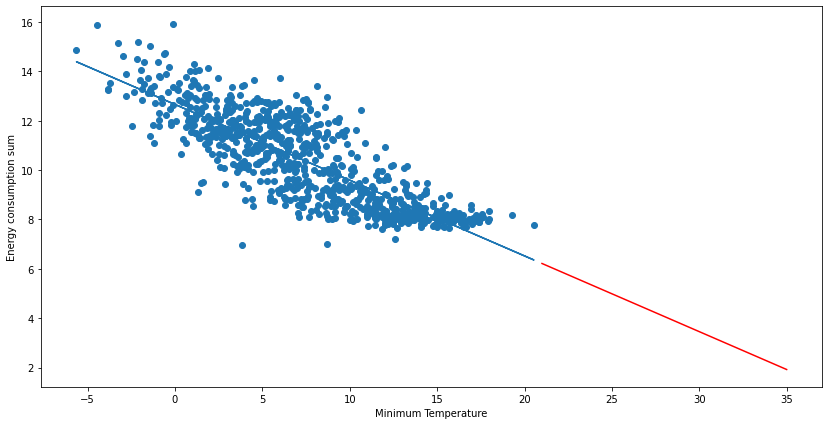

In [20]:
plt.figure(figsize=(14,7))
plt.scatter(model_df[["temperatureMin"]], model_df[["energy_sum"]])
plt.xlabel("Minimum Temperature")
plt.ylabel("Energy consumption sum")
plt.plot(model_df[["temperatureMin"]], regressor1.predict(model_df[["temperatureMin"]]))
plt.plot(future_temp, future_energy_consumption, color="r")
plt.show()

## Linear regression model - energy consumption v number of daylight hours

In [21]:
regressor2 = LinearRegression()
regressor2.fit(model_df[["dayTime"]], model_df[["energy_sum"]])

LinearRegression()

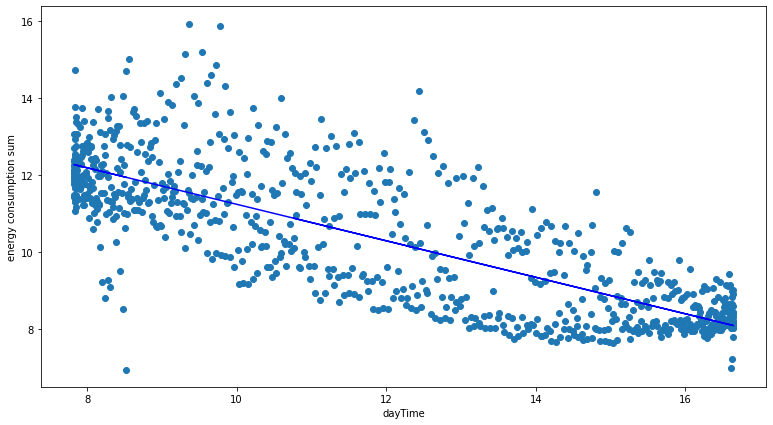

In [22]:
plt.figure(figsize=(13,7))
plt.scatter(model_df[["dayTime"]], model_df[["energy_sum"]])
plt.plot(model_df[["dayTime"]], regressor2.predict(model_df[["dayTime"]]), color="b")
plt.xlabel("dayTime")
plt.ylabel("energy consumption sum")
plt.show()

The scatter plot above also shows a downward trend which mean that, as expected, more energy is consumed when the days are shorter.

In [23]:
print("the R-sqaured is", round(regressor2.score(df_merged[["dayTime"]], df_merged[["energy_sum"]]),2))
print("the intercept is", regressor2.intercept_)
print("the coefficient is", regressor2.coef_)

the R-sqaured is 0.59
the intercept is [15.98837794]
the coefficient is [[-0.47433065]]


Taking a look at the value of our R-squared, we can see that almost 60% of our the energy consumption can be impacted by the number of daylight hours. Our regression line is expected to hit the y-axis just below 16.

In [24]:
# predicting the energy likely to be  consumed between 17:00 pm and 22:00 pm
evening_time = np.array(range(17, 23))
evening_time = evening_time.reshape(-1, 1)
energy_consumption = regressor2.predict(evening_time)
energy_consumption

array([[7.92475684],
       [7.45042618],
       [6.97609553],
       [6.50176488],
       [6.02743422],
       [5.55310357]])

## Multiple linear regression model - energy consumption v number of daylight hours v minimum temperature (using statsmodels)

From our previous linear models we created for our target variable (energy_sum), we can see that two independent variables both show a fairly significant impact. The reason why we carried out two seperate linear regression models was to show how each independent variable affected the energy consumption individually. Next we will use statsmodels to create a multiple regression model.

In [25]:
model_df = sm.add_constant(model_df)
model_df_y = model_df["energy_sum"]
model_df_x = model_df[['const','dayTime', 'temperatureMin']]
model_df_ols = sm.OLS(model_df_y, model_df_x).fit()
model_df_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             energy_sum   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1595.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          7.31e-284
Time:                        12:08:17   Log-Likelihood:                -1027.8
No. Observations:                 826   AIC:                             2062.
Df Residuals:                     823   BIC:                             2076.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.0332      0.122    123.109      0.000      14.793      15.273
dayTime           -0.2653      0.012    -21.531      0.000      -0.289      -0.241
temperatureMin    -0.2037      0.008    -26.847      0.000      -0.219      -0.189
==============================================================================
Omnibus:                       43.444   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.613
Skew:                          -0.097   Prob(JB):                     1.77e-31
Kurtosis:                       5.019   Cond. No.                         62.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the statistical summary above, we can see a lot of information regarding our OLS regression model between our independent variables and the dependent variable. Below is the significant information:
- An adjusted R-squared value of 0.79 shows that the model is accurate and it also tells us that almost 80% of the energy consumption variation can be eplained or impacted by both independent variables.
- A p value of less than 0.05 shows a statistical significance of our claim that the two independent variable impacts our target variable.

**CONCLUSION**

Due to all the statistical evidence, visualizations and the predictions we carried out, we can say it's true that the energy sum is impacted by the temperature and the daytime.